In [2]:
import os
from keras import Input
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [4]:
def f(x):
    return 2*np.sin(x)

In [5]:
x_train=np.linspace(0, 2*np.pi, 20).reshape(-1, 1)
y_train=f(x_train)

step=(2*np.pi) / 20

x_test=(x_train.flatten() + step/2)
x_test=x_test.reshape(-1, 1)
y_test=f(x_test)

In [6]:
def create_model(f_n_size):
    d_model=Sequential()
    d_model.add(Input(shape=(1,)))
    d_model.add(Dense(f_n_size, activation='tanh'))
    d_model.add(Dense(f_n_size, activation='tanh'))
    d_model.add(Dense(1))
    d_model.compile(optimizer='adam', loss='mse')
    return d_model

In [7]:
final_loss=1.0
n_size=1
all_mse=[]
all_sizes=[]
c_model=create_model(n_size)

while final_loss > 0.01:
    c_model=create_model(n_size)

    history=c_model.fit(x_train, y_train, epochs=500, verbose=0)
    final_loss = history.history['loss'][-1]

    print(f"Size: {n_size} MSE: {final_loss:.4f}")
    all_mse.append(final_loss)
    all_sizes.append(n_size)

    n_size+=10

I0000 00:00:1758621549.361981 2341680 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9031 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9
2025-09-23 12:59:10.132562: I external/local_xla/xla/service/service.cc:163] XLA service 0x763e84002da0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-23 12:59:10.132577: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 SUPER, Compute Capability 8.9
2025-09-23 12:59:10.147082: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-23 12:59:10.192661: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91300
I0000 00:00:1758621550.310180 2341798 device_compiler.h:196] Compiled cluster using XLA!  This line is l

Size: 1 MSE: 1.2341
Size: 11 MSE: 0.2760


2025-09-23 12:59:34.470764: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_285', 4 bytes spill stores, 4 bytes spill loads



Size: 21 MSE: 0.2263


2025-09-23 12:59:46.996996: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_285', 4 bytes spill stores, 4 bytes spill loads



Size: 31 MSE: 0.2744
Size: 41 MSE: 0.0720


2025-09-23 13:00:11.920176: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_120', 8 bytes spill stores, 8 bytes spill loads



Size: 51 MSE: 0.0128


2025-09-23 13:00:24.381153: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_120', 8 bytes spill stores, 8 bytes spill loads



Size: 61 MSE: 0.0110


2025-09-23 13:00:36.411029: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-23 13:00:36.893734: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_120', 324 bytes spill stores, 324 bytes spill loads

2025-09-23 13:00:36.963332: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_120', 296 bytes spill stores, 296 bytes spill loads



Size: 71 MSE: 0.0010


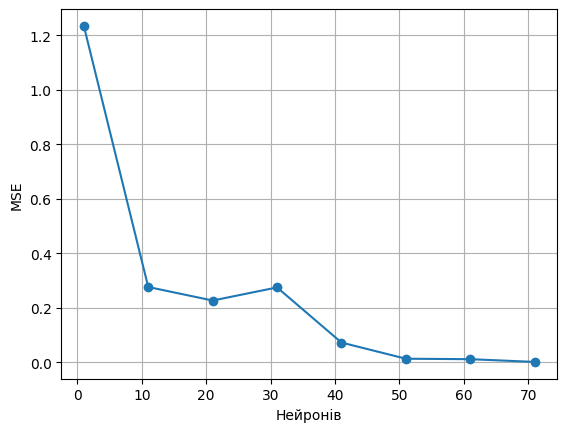

In [8]:
plt.plot(all_sizes, all_mse, marker='o')
plt.xlabel("Нейронів")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

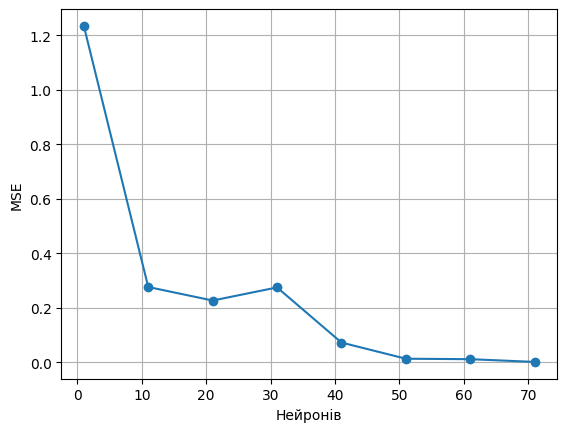

In [11]:
plt.plot(all_sizes, all_mse, marker='o')
plt.xlabel("Нейронів")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

Навчальна вибірка

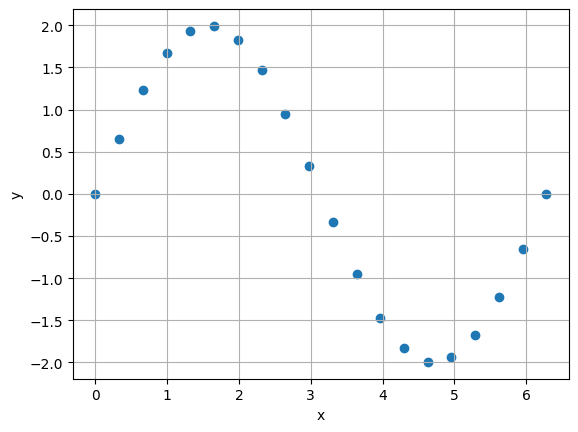

In [12]:
plt.scatter(x_train, y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

Тестова вибірка

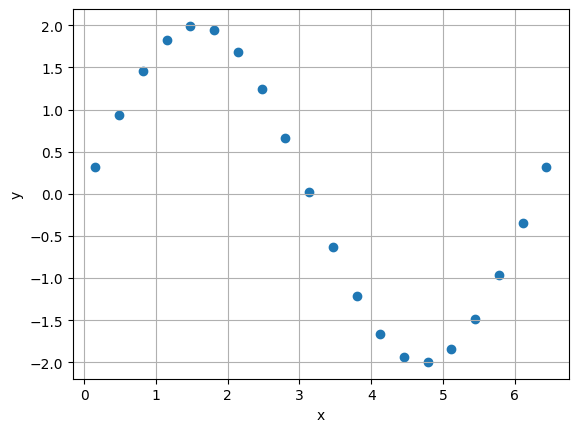

In [13]:
plt.scatter(x_test, y_test)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [15]:
y_pred_train=c_model.predict(x_train)
y_pred_test=c_model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


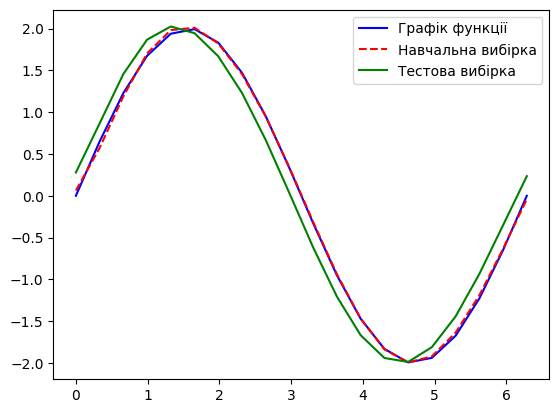

In [30]:
plt.plot(x_train, y_train, c='b', label='Графік функції')
plt.plot(x_train, y_pred_train, 'r--', label='Навчальна вибірка')
plt.plot(x_train, y_pred_test, 'g', label='Тестова вибірка')
plt.legend()
plt.show()